In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

# Probability

<!-- requirement: images/rv_flowchart.png -->

In [2]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pylab as plt

# Throwing dice
Theoretical mean is 3.5

In [37]:
for i in range(10):
    trials = np.random.randint(low=1, high=7, size=70000)
    print(f"Mean: {trials.mean():.4f} Variance:  {trials.var():.4f}")   

Mean: 3.5075 Variance:  2.9239
Mean: 3.4910 Variance:  2.9203
Mean: 3.5134 Variance:  2.9307
Mean: 3.4915 Variance:  2.9097
Mean: 3.5007 Variance:  2.9120
Mean: 3.4982 Variance:  2.9076
Mean: 3.4927 Variance:  2.9219
Mean: 3.4965 Variance:  2.9314
Mean: 3.4904 Variance:  2.9025
Mean: 3.5003 Variance:  2.9168


In [3]:
from scipy.stats import norm

def plot_hist_dist(rvs, dist, title=None, label='', ax=None, line_color='black', bar_color='blue'):
    ax = ax if ax else plt.gca()
    _, bins, _ = ax.hist(rvs, bins=50, alpha=.6, density=True, label=(label + ' rvs').strip(), color=bar_color)
    xmin, xmax = bins.min(), bins.max()
    xpoints = np.arange(xmin, xmax, (xmax - xmin) / 100)
    ax.plot(xpoints, dist.pdf(xpoints), label=(label+' pdf').strip(), color=line_color)
    if title:
        ax.set_title(title)
    ax.legend()
    
def plot_hist_dist_discrete(rvs, dist, title=None, label='', ax=None, line_color='black', bar_color='blue'):
    ax = ax if ax else plt.gca()
    uniques = np.unique(rvs)
    mids = (uniques[1:] + uniques[:-1]) / 2.
    bins = np.hstack([[uniques[0]-.5], mids, [uniques[-1] + .5]])
    plt.hist(rvs, bins=bins, density=True, label=(label + ' rvs').strip(), alpha=.6, color=bar_color)
    if title:
        ax.set_title(title)
    plt.plot(uniques, dist.pmf(uniques), label=(label + ' pmf').strip(), color=line_color)
    ax.legend()
    
def print_mean_variance(rvs, dist):
    print("Mean:     Theoretical {:.4f}, Actual {:.4f}".format(dist.mean(), rvs.mean()))
    print("Variance: Theoretical {:.4f}, Actual {:.4f}".format(dist.var(),  rvs.var()))

# factorial $n!$

$$ n! = 1 . 2 . .. n $$

In [45]:
np.math.factorial(5)

120

In [54]:
def factorial(d):
    f = 1
    for n in range(1,d+1):
        f = f*n
    return f

factorial(5)

120

# Kombinační číslo:

Kombinační číslo je matematická funkce, která udává počet kombinací, tzn. způsobů, jak vybrat k-prvkovou podmnožinu z n-prvkové množiny (k\, a n\, jsou čísla přirozená). 

$$ \binom{n}{k} = \frac{n!}{k!(n-k)!} $$

In [ ]:
%pip install ipywidgets

In [6]:
from ipywidgets import interact, FloatSlider, IntSlider
from functools import wraps

def gen_interact_dist(plotter):
    @wraps(plotter)
    def wrapper(dist, xlim, ylim, N=2000):
        def wrapped(**kwargs):
            _dist = dist(**kwargs)
            rvs = _dist.rvs(N)

            plotter(_dist, rvs, xlim)

            plt.title(_dist.dist.name)
            plt.xlim(xlim)
            plt.ylim(ylim)
            plt.legend()
        return wrapped
    return wrapper

@gen_interact_dist
def interact_dist(dist, rvs, xlim):
    """
    Function plots rvs and pdf given a dist, xlim, and ylim
    """
    x = np.linspace(*xlim, num=5000)
    p = dist.pdf(x)
    plt.hist(rvs, bins=50, density=True, alpha=0.6, color='blue', label='rvs')
    plt.plot(x, p, color='black', label='pdf')

@gen_interact_dist
def interact_dist_discrete(dist, rvs, xlim):
    """
    Function plots rvs and pmf given a dist, xlim, and ylim
    """
    x = np.linspace(*xlim, num=5000, dtype=int)
    p = dist.pmf(x)
            
    uniques = np.unique(rvs)
    mids = (uniques[1:] + uniques[:-1]) / 2.
    bins = np.hstack([[uniques[0]-.5], mids, [uniques[-1] + .5]])
    
    plt.hist(rvs, bins=bins, density=True, alpha=0.6, color='blue', label='rvs')
    plt.plot(x, p, color='black', label='pdf')


## Random Variables


Probability and statistics are based on the notion of a **random variable**.  Random variables are *abstract mathematical quantities* (often denoted $X$) which can take on values at random.  Random variates (`rvs`) are instances of random variables.

**Example:** Suppose we roll a standard fair die.  The number shown on top is a random variable taking on the values 1 through 6, inclusive.

While the value of a variate can be anything, we know what values tend to be based on a **distribution**, $p(x)$, which is the probability of $X$ taking on any value $x$.  Their distributions are how we reason about randomness mathematically.

**Example:** In the previous dice example, the dice rolls are distributed evenly ($\frac{1}{6}$ probability of each event) over all six possible values.

While people (including us) often use a random variable and its distribution interchangeably, these are *not* the same concept and the distinction is not semantic.

**Example:** Suppose we have two dice, one red and one blue but otherwise identical.  Their rolls would be represented by two different random variables.  These two random variables have the same distribution.

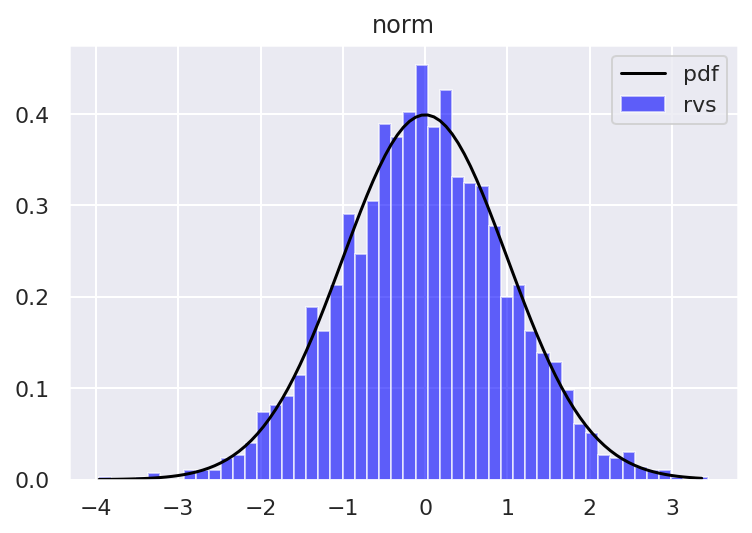

In [7]:
plot_hist_dist(norm.rvs(size=2000), norm, title=norm.name)

## Statistics of Random Variables


### Discrete Random Variables

For discrete-valued random variables, we can plot the distribution (or more precisely, the probability mass function or **PMF**, $p(x)$, which denotes the probability that $X = x$) of a random variable.  The **PMF** has the critical properties that it is non-negative $(p(x) \ge 0)$ and 
$$ \sum_x p(x) = 1 \,.$$

We can compute statistics about random variables using the expectation operator $\mathbb{E}$.  The expectation operator has the following definition:
$$ \mathbb{E}[f(x)] = \sum f(x) p(x) $$

A simple (and important) example is the mean
$$ \mathbb{E}[X] = \sum x p(x) $$

We can also calculate the variance
$$ \mbox{Var}[X] = \mathbb{E}\left[(X-\mathbb{E}[X])^2\right] = \sum x^2 p(x) - \left( \sum x p(x) \right)^2 \,. $$
The standard deviation is simply the square root of the variance.

We may also wish to calculate the probability $\mathbb{P}$ of different **events** associated with these random variables.  For example the cumulative distribution function or **CDF** of a random variable is associated with the events

$$ F_X(a) = \mathbb{P}[X \le a] = \sum_{x \le a} p(x)\,. $$

**Examples:** There are a number of important random variables.  The discrete ones have distributions such as:

1. Bernoulli Distribution
1. Binomial Distribution
1. Geometric Distribution
1. Poisson Distribution


### Continuous Random Variables

So far, we have only given the formulas for discrete-valued random variables.  Continuous random variables have a probability distribution function or **PDF**, also denoted $p(x)$.  A PDF has to be non-negative ($p(x) \ge 0$) and satisfy
$$ \int_{(-\infty, \infty)} p(x) dx = 1\,. $$

Similarly you will also hear about the cumulative distribution function or **CDF** defined as
$$ F_X(x) = \int_{(-\infty, x]} p(y)dy\,. $$

The probability density of $X = x$ is given by $p(x)$.  Put another way, the probability that $a < X \le b$ is given by the integral
$$ \mathbb{P}[a < X \le b] = \int_{(a, b]}p(x)dx = F_X(b) - F_X(a) \,. $$

We can extend the statistics of discrete random variables to continuous random variables by exchanging discrete sums for continuous integrals.

$$ \mathbb{E}[f(x)] = \int_{(-\infty, \infty)} f(x) p(x) dx $$


**Examples:** Continuous random variables may have distributions such as:

1. Beta Distribution
1. Exponential Distribution
1. Normal Distribution

**Exercise:** What would the corresponding formulas for mean and standard deviation look like for continuous-valued random variables?

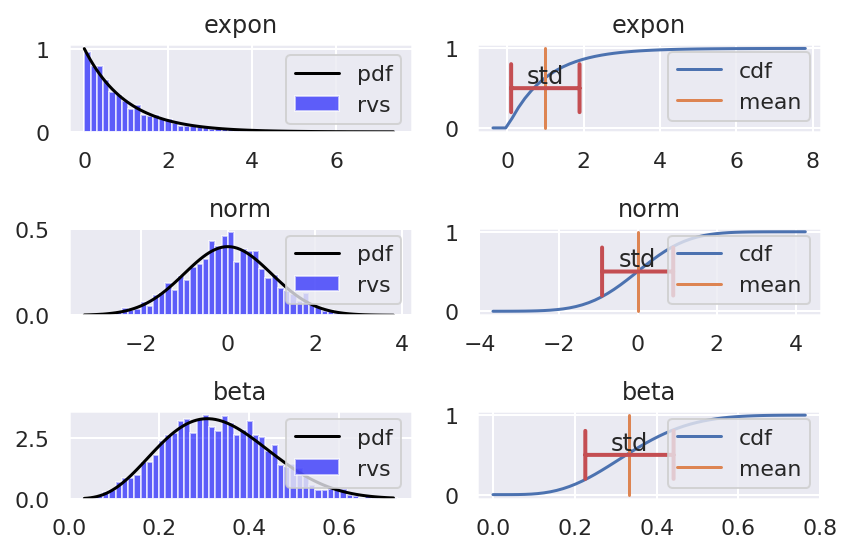

In [8]:
# Some examples of distributions

dists = (sp.stats.expon(),
         sp.stats.norm(),
         sp.stats.beta(a=5, b=10))
for k, dist in enumerate(dists):
    ax = plt.subplot(3,2,2*k+1)
    plot_hist_dist(dist.rvs(size=2000), dist, title=dist.dist.name, ax=ax)

    xs = np.linspace(*plt.xlim())
    ax = plt.subplot(3,2,2*k+2)
    ax.plot(xs, dist.cdf(xs), label='cdf')
    mean, var = dist.stats('mv')
    ax.plot([mean]*2, [0., 1.], label='mean')
    plt.text(mean, 0.5, 'std', ha='center', va='bottom')
    plt.annotate("", xy=(mean-np.sqrt(var), 0.5), xycoords='data',
                 xytext=(mean+np.sqrt(var), 0.5), textcoords='data',
                 arrowprops=dict(arrowstyle="|-|", lw=2, color='r'))    

    ax.legend(loc='lower right')
    ax.set_title(dist.dist.name)
plt.tight_layout()

## Quantile Functions


The **quantile function** (denoted $q_X(u)$) is the inverse of the cumulative distribution function or CDF $F_X(x)$.  That is,

$$ q_X (F_X(x)) = x \qquad F_X(q_X(u)) = u$$

Notice that since the range of $F_X$ is only $(0,1)$, then $q_X$ is a function on $(0,1)$.

**Theorem:** If $U$ is a uniform random variable then $q_X(U)$ is has the same distribution as $X$.



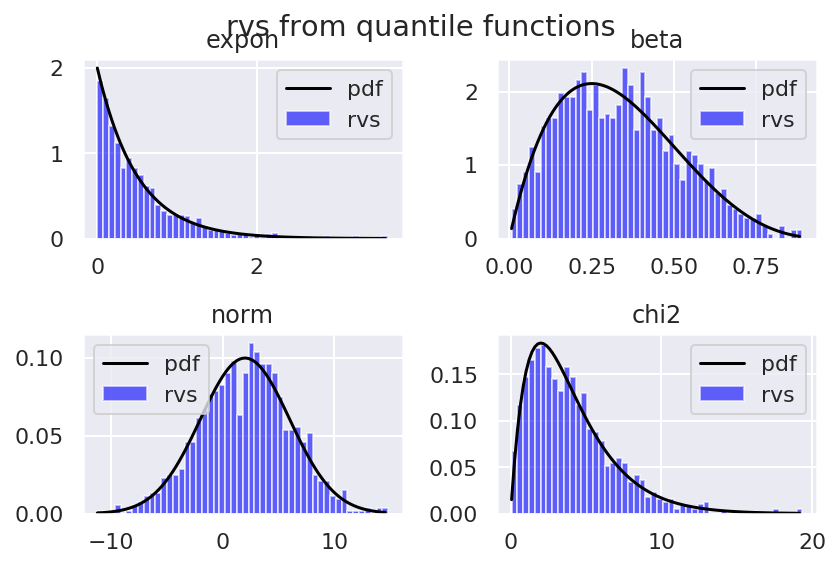

In [33]:
# Quantile functions to generate random variables

N = 1000

dists = (
    sp.stats.expon(scale=1/2.),
    sp.stats.beta(a=2., b=4.),
    sp.stats.norm(loc=2., scale=4.),
    sp.stats.chi2(df=4.)
)

rvs = sp.stats.uniform().rvs(size=N)
for k, dist in enumerate(dists):
    ax = plt.subplot(2,2,k+1)
    plot_hist_dist(dist.ppf(rvs), dist, title=dist.dist.name, ax=ax)
plt.suptitle('rvs from quantile functions')
plt.tight_layout()

## Modeling observations with random variables


Many phenomena in the world are modeled as random variables. By considering the characteristics of the phenomena we would like to model, we can assume an appropriate random variable. Such assumptions lay the groundwork for statistic inference about the world. We can use measurements of the observed phenomena to compute statistics and estimate parameters of our model.

The following flow-chart is a short guide to some of the more common random variables we might use as models of real-world phenomena.

![Random variable flowchart](images/rv_flowchart.png)

Simply knowing whether your observed values will be discrete or continuous, bounded or unbounded, already puts constraints on what kinds of random variables we might use to model a given phenomenon. However, a random variable will often only be appropriate as a model if the phenomenon meets certain assumptions. We'll explore each of the above random variables in more depth and expand upon these assumptions.

## Bernoulli Trials


Bernoulli, binomial, and geometric random variables are all defined in terms of **Bernoulli trials**. A Bernoulli trial is an event that is either a success or a failure. For example, a coin flip results in heads or tails, and we might define heads as success and failure as tails.

Bernoulli trials are assumed to be _independent_. If we are considering a random variable based on several Bernoulli trials (i.e. binomial or geometric random variables), we might also require that the outcomes of the Bernoulli trials are _identically distributed_.

### Bernoulli Random Variable


The Bernoulli random variable is the simplest random variable in probability.  The value of the trial $X$ can take on either $0$ (failure) or $1$ (success) and it is parameterized by the value $\Pi$, which is the probability that it is a success.  The PMF is given by

$$ p(x) = \left\{ \begin{align} \Pi && \mbox{if }x=1 \\ 1-\Pi && \mbox{if }x = 0 \end{align} \right. \,.$$

**Examples:**
- We can think of $p$ as the probability a (biased) coin lands on heads after a flip.
- Whether a user clicks on a displayed advertisement.
- Whether a borrower defaults on a loan.

**Stats:**
- The mean is $\mathbb{E}[X] = \Pi$
- The variance is $\mbox{Var}[X] = \Pi(1-\Pi)$.

In [34]:
# Mean and variance of the Bernoulli

p = .4

dist = sp.stats.bernoulli(p)
rvs = dist.rvs(size=1000)
print_mean_variance(rvs, dist)

Mean:     Theoretical 0.4000, Actual 0.4000
Variance: Theoretical 0.2400, Actual 0.2400


### Independence and Conditional Expectation


Two random variables are independent if knowing the results of one does not tell you anything about the other.  That is, if $p_{X, Y}(x,y)$ is the joint PMF or PDF for $(X,Y)$ and $p_X(x)$ and $p_Y(y)$ are the PMF or PDF for $X$ and $Y$, then a variable is independent if and only if

$$ p_{X, Y}(x,y) = p_X(x)p_Y(y)\,. $$

The **covariance** of two random variables $X$ and $Y$ is given by

$$ \begin{split} \mbox{Cov}[X,Y] &= \mathbb{E}\left[(X - \mathbb{E}[X]) (Y - \mathbb{E}[Y])\right] \\
&= \mathbb{E}[XY] - \mathbb{E}\left[X \,\mathbb{E}[Y]\right] - \mathbb{E}\left[Y \,\mathbb{E}[X]\right] + \mathbb{E}[X]\mathbb{E}[Y] \\
&= \mathbb{E}[XY] - \mathbb{E}[X]\mathbb{E}[Y] \end{split} $$

If two variables are independent, their *covariance* is zero, or equivalently the expectation of the product is just the product of their expectations
$$ \mathbb{E}[XY] = \mathbb{E}[X]\mathbb{E}[Y] \,.$$

**Warning:** Just because two variables have zero covariance does not mean they are independent!  For example, if $X$ is a random variable taking on the values $\{-1, 0, 1\}$ with equal probability and $Y = X^2$, then they have zero covariance but are not independent.

When speaking of the joint distribution of random variables, it is often useful to speak of the **conditional expectation** given by
$$ \mathbb{E}[X \mid Y=y] = \sum_{x} x \frac{p_{X, Y}(x,y)}{p_Y(y)}\,. $$
It's useful to think of the above conditional expectation as a function of $y$.  We may also want to take the **conditional probability** of events related to $X$,
$$ \mathbb{P}[X \le a \mid Y=y] = \sum_{x \le a} \frac{p_{X, Y}(x,y)}{p_Y(y)}\,. $$

**Theorem:** If you have two independent random variables, $X$ and $Y$, the means add
$$ \mathbb{E}[X + Y] = \mathbb{E}[X] + \mathbb{E}[Y] $$
and variances add
$$ \mbox{Var}[X + Y] = \mbox{Var}[X] + \mbox{Var}[Y]\,. $$

**Exercise:** What is the standard deviation of $X + Y$?
1. What is the standard deviation if you add $n$ independent and identically distributed random variables:
$$X_1 + \cdots + X_n$$
2. What is the standard deviation of the average:
$$ \frac{X_1 + \cdots + X_n}{n} $$

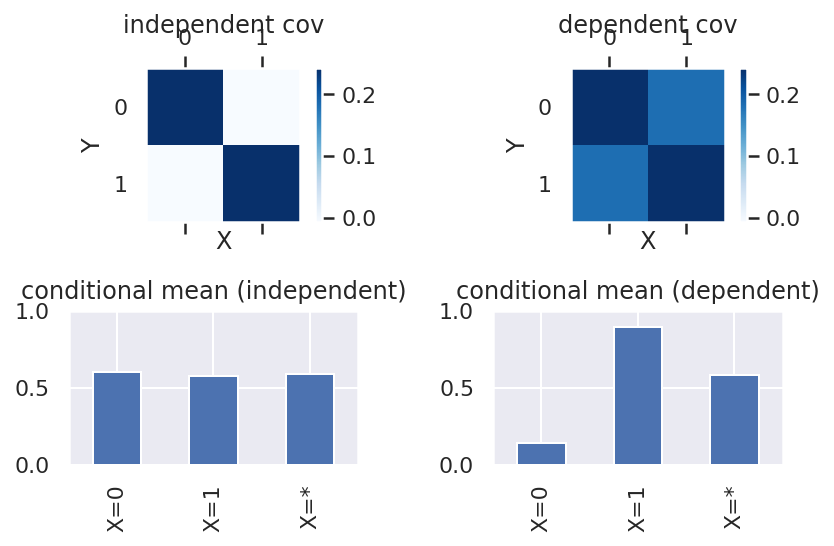

In [38]:
# Independent and dependent Bernoulli random variables

p = .6
q = .9
r = p / (1-p) * (1-q)
N = 2500

# independent random variables
rvs_x1 = sp.stats.bernoulli(p).rvs(size=N)
rvs_y1 = sp.stats.bernoulli(p).rvs(size=N)

# dependent random variables
rvs_x2 = sp.stats.bernoulli(p).rvs(size=N)
rvs_y2 = sp.stats.bernoulli(np.where(rvs_x2, q, r)).rvs(size=N)

cov1 = np.cov(rvs_x1, rvs_y1)
cov2 = np.cov(rvs_x2, rvs_y2)

vmin = min(cov1.min(), cov2.min())
vmax = min(cov1.max(), cov2.max())

plt.subplot(2, 2, 1)
plt.matshow(cov1, fignum=False, vmin=vmin, vmax=vmax, cmap=plt.cm.Blues)
plt.grid(False)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('independent cov', y=1.15)
plt.colorbar()

plt.subplot(2, 2, 2)
plt.matshow(cov2, fignum=False, vmin=vmin, vmax=vmax, cmap=plt.cm.Blues)
plt.grid(False)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('dependent cov', y=1.15)
plt.colorbar()

plt.subplot(2, 2, 3)
pd.Series({
    'X=0': rvs_y1[rvs_x1==0].mean(),
    'X=1': rvs_y1[rvs_x1==1].mean(),
    'X=*': rvs_y1.mean(),
}).plot(kind='bar', title='conditional mean (independent)')
plt.ylim([0., 1.])

plt.subplot(2, 2, 4)
pd.Series({
    'X=0': rvs_y2[rvs_x2==0].mean(),
    'X=1': rvs_y2[rvs_x2==1].mean(),
    'X=*': rvs_y2.mean(),
}).plot(kind='bar', title='conditional mean (dependent)')
plt.ylim([0., 1.])

plt.tight_layout();

### Binomial Random Variable


The Binomial random variable is just the sum of $n$ independent Bernoulli random trials each with an independent probability $\Pi$ of success.  Its PMF is given by the binomial theorem:

$$ p(k) = \binom{n}{k} \Pi^k(1-\Pi)^{n-k}\,. $$

You can easily derive this formula by considering a coin with a probability, $\Pi$, of flipping heads and calculating the probability of seeing $k$ heads out of $n$ flips.

**Examples:**
- The total number of times a biased coin lands on heads after being flipped $n$ times.
- The total number of ad clicks after seeing $n$ ads if a user has an independent probability $\Pi$ of clicking on an advertisement.
- The number of points scored after $n$ free-throw attempts if each attempt has $\Pi$ probability of succeeding.

**Stats:**
- The mean is $\mathbb{E}[X] = n\Pi$
- The variance is $\mbox{Var}[X] = n\Pi(1-\Pi)$.

Notice that the mean increases with both $n$ and $\Pi$ but that the variance decreases with $\Pi$ for a fixed mean: $\mbox{Var}[X] = \mathbb{E}[X] \cdot (1-\Pi)$.  This is illustrated in the plots below.

In [41]:
# Binomial distribution, two parameters

n_slider = IntSlider(value=10, min=5, max=50, step=1, description='n')
pi_slider = FloatSlider(value=0.5, min=0.2, max=0.8, step=0.05, description='$\Pi$')
interact(
    interact_dist_discrete(sp.stats.binom, xlim=[0, 18], ylim=[0, 0.3]), 
    n=n_slider, p=pi_slider
);

interactive(children=(IntSlider(value=10, description='n', max=50, min=5), FloatSlider(value=0.5, description=…

**Theorem:** The sum of $n$ independent Bernoulli trials with probability $\Pi$ of success is a Binomial with parameters $n$ and $\Pi$.

**Exercise:** Prove the formulas for mean and variance using the fact that the Binomial is the sum. 

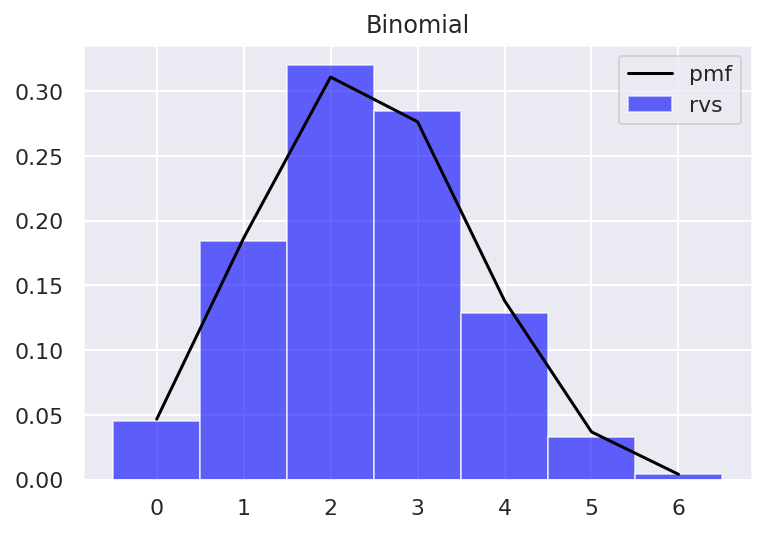

In [60]:
# Binomial is the sum of Bernoulli

p = .4
n = 6

rvs = sp.stats.bernoulli(p).rvs(size=[n, 1000]).sum(axis=0)
dist=sp.stats.binom(n, p)

plot_hist_dist_discrete(rvs, dist, title="Binomial")

### Geometric Distribution


The geometric distribution models the number $X$ of independent Bernoulli trials needed to obtain a success -- that is, we keep testing independent Bernoulli random variables until we are successful and measure the (random) number of such trials.  The PMF is given by

$$ p(k) = (1-\Pi)^{k-1}\Pi \,. $$

**Examples:**
- Suppose a chef needs to crack an egg without breaking a yolk.  If she keeps the yolks intact with probability $p$,  then $p(k)$ is the PMF over the number of eggs it takes.
- A newly-wed couple plans to have children until they have a girl.  The total number of children they expect to have is geometrically distributed.
- A person being treated for cancer is given chemotherapy drugs which have independent and identically distributed probability $\Pi$ of successful treatment.  The number of drugs he must take until he is successfully treated is geometrically distributed.

**Stats:**
- The mean is $\mathbb{E}[X] = \frac{1}{\Pi}$
- The variance is $\mbox{Var}[X] = \frac{1-\Pi}{\Pi^2}$.

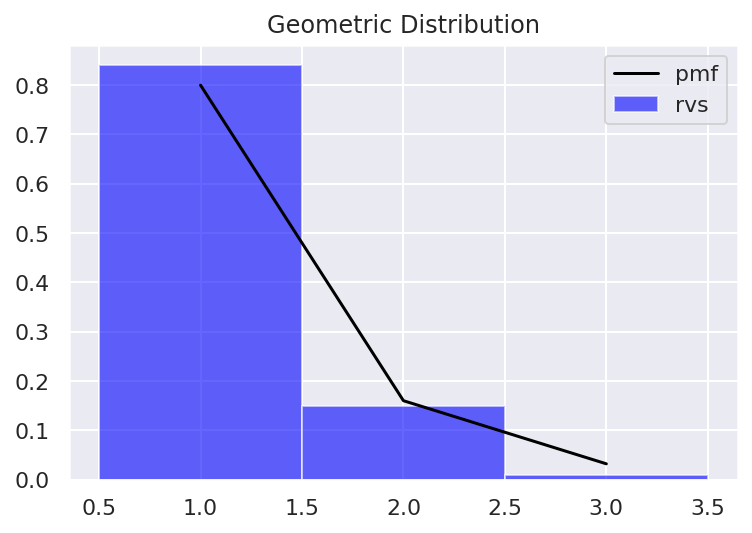

In [61]:
# The geometric distribution is the number of Bernoulli trials
# before a successful trial

p = .8

def geom(p):
    dist = sp.stats.bernoulli(p)
    k = 1
    while not dist.rvs():
        k += 1
    return k

rvs = np.zeros(shape=100)
for k in range(len(rvs)):
    rvs[k] = geom(p)

dist = sp.stats.geom(p)
plot_hist_dist_discrete(rvs, dist, title="Geometric Distribution")

As $\Pi$, the probability of success for any given trial, increases, we would expect the first success to occur early and the mean of the geometric random variable to be lower.  This is born out in the plots below.

In [62]:
# Geometric distribution, one parameter

Pi_slider = FloatSlider(value=0.5, min=0.05, max=1.0, step=0.05, description='$\Pi$')
interact(
    interact_dist_discrete(sp.stats.geom, xlim=[1, 20], ylim=[0, 0.8]),
    p=Pi_slider
);

interactive(children=(FloatSlider(value=0.5, description='$\\Pi$', max=1.0, min=0.05, step=0.05), Output()), _…

### Memoryless Property


The geometric distribution is _memoryless_.  Suppose your first successful Bernoulli trial is distributed $p(k)$.  Because the draws of the Bernoulli trials are independent, if you have $n$ failed trials, the distribution of *remaining* number of trials until success is still $p(k)$.  The process forgets its history. Past failures do not influence future probability of success.

**Examples:** After breaking $n$ eggs, the distribution of the number of eggs our chef must still crack is the same as when she started.

Mathematically, we observe that if $X$ is distributed as $p(k)$,
$$ P[X=(n+k) \mid X \ge n] = (1-\Pi)^{k-1}\Pi = P[X=k] $$

**Exercise:** Use the definition of conditional probability to prove the above statement.

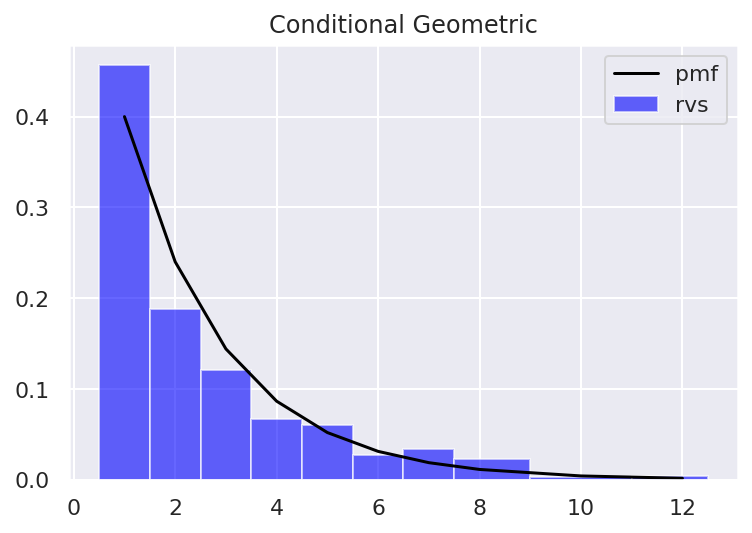

In [63]:
# The memoryless property of the geometric distribution

p = .4
n = 5
N = 2000

dist = sp.stats.geom(p)
rvs = dist.rvs(size=N)
plot_hist_dist_discrete(rvs[rvs > n] - n, dist, title="Conditional Geometric")

## Poisson Distribution


The Poisson distribution is a discrete-valued distribution representing the counts of independent events occurring within a fixed interval of time or space (which could be abstract, i.e not necessarily physical space).  The Poisson distribution describes an _arrival process_ (sometimes called a Poisson process), in which events occur at random with some fixed average rate. The Poisson distribution makes a few key assumptions:
- Independence: the occurrence of any single event does not affect the likelihood of another
- The events have the same likelihood of occurring on average
- The probability of an event occurring is proportional to the length of the interval

The distribution is parameterized by the rate parameter, $\lambda$, and has a PMF

$$ p(k) = \frac{\lambda^k e^{-\lambda}}{k!} $$

**Stats:**
- The mean is $\mathbb{E}[X] = \lambda$
- The variance is $\mbox{Var}[X] = \lambda$.

**Examples:**
- The number of goals scored in a World Cup match.
- The number of patient arrivals to an emergency room in one day.
- The number of asteroids hitting the earth each year.
- The number of Prussian Cavalry Officers kicked by their horse each year.

In [64]:
# Poisson distribution, one parameter

lambda_slider = FloatSlider(value=2.0, min=2.0, max=8.0, step=0.05, description='$\lambda$')
interact(
    interact_dist_discrete(sp.stats.poisson, xlim=[0, 20], ylim=[0, 0.28]),
    mu=lambda_slider
);

interactive(children=(FloatSlider(value=2.0, description='$\\lambda$', max=8.0, min=2.0, step=0.05), Output())…

## Exponential Distribution


The exponential distribution is a non-negative continuous random variable whose PDF is shaped exponentially

$$ p(x) = \lambda e^{-\lambda x} $$

The length of time (or space) between events in an arrival process are exponentially distributed. Therefore, the exponential distribution is closely related to the Poisson distribution, and they share the parameter, $\lambda$.

For example, imagine we track the arrival of customers at a store during a business day, and assume the customers arrive randomly with some average rate. When the store opens, we start a stopwatch, and when the first customer arrives we record the time on the stopwatch. We then reset the stopwatch and measure the length of time between the arrival of the first customer and the arrival of the second customer.

In this scenario, the times will be exponentially distributed with rate parameter, $\lambda$. The number of customers that arrive during opening hours will be Poisson distributed also with rate parameter, $\lambda$.

**Stats:**
- The mean is $\mathbb{E}[X] = \frac{1}{\lambda}$
- The variance is $\mbox{Var}[X] = \frac{1}{\lambda^2}$.

In [56]:
# Exponential distribution, one parameter
# Note: scipy defines the distribution as exp(-(x-loc)/scale)/scale

scale_slider = FloatSlider(value=0.5, min=0.5, max=2.0, step=0.05, description='$1/\lambda$')
interact(
    interact_dist(sp.stats.expon, xlim=[0, 6], ylim=[0, 2]),
    scale=scale_slider
);

interactive(children=(FloatSlider(value=0.5, description='$1/\\lambda$', max=2.0, min=0.5, step=0.05), Output(…

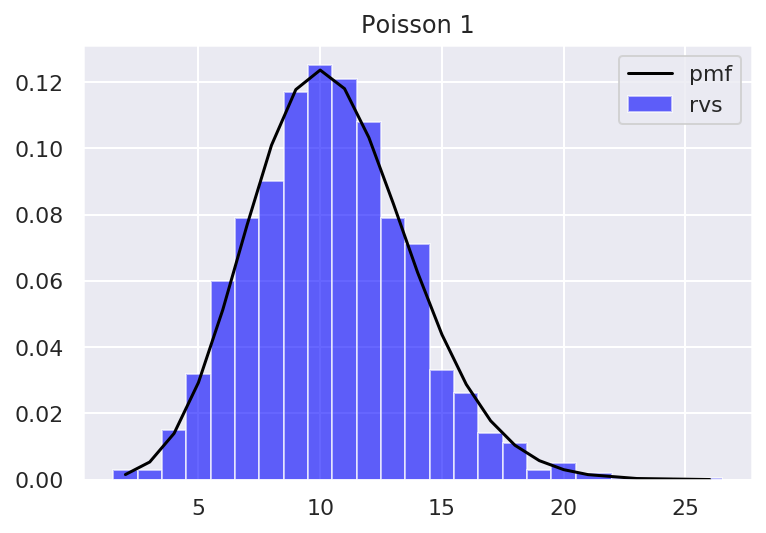

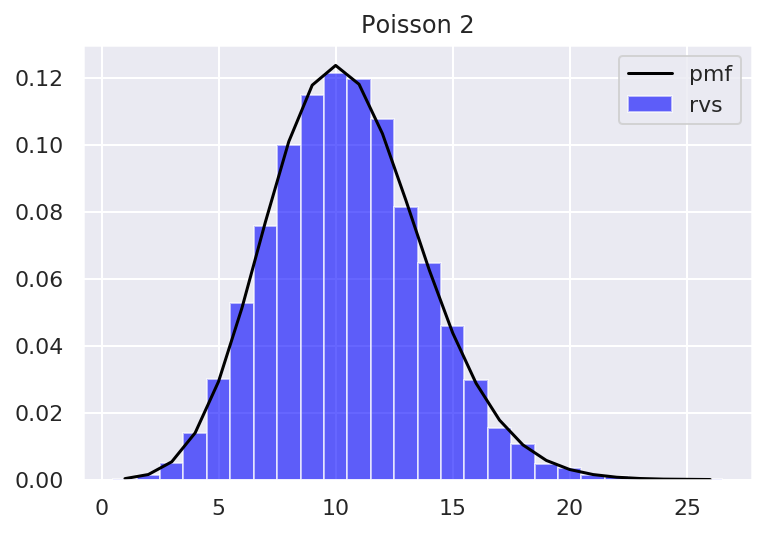

In [57]:
# Poisson distribution as waiting times
lam = 3.5
T = 3.
N = 1000
M = 100

exp_rvs = sp.stats.expon(scale=1./lam).rvs(size=[N, M])
waiting_times_rvs = np.cumsum(exp_rvs, axis=1)
poisson_rvs = (waiting_times_rvs <= T).sum(axis=1)
plt.figure()
plot_hist_dist_discrete(poisson_rvs, sp.stats.poisson(mu=lam * T), title="Poisson 1")

poisson_rvs = np.bincount(np.floor(np.cumsum(exp_rvs) / T).astype(int))
plt.figure()
plot_hist_dist_discrete(poisson_rvs, sp.stats.poisson(mu=lam * T), title="Poisson 2")

You may notice that the PDF of the exponential distribution is similar to the PMF of the geometric distribution. The exponential distribution also has a memoryless property:

$$ \mathbb{P}[X=x+k \mid X \ge k]= \lambda e^{-\lambda x} = \mathbb{P}[X=x]$$

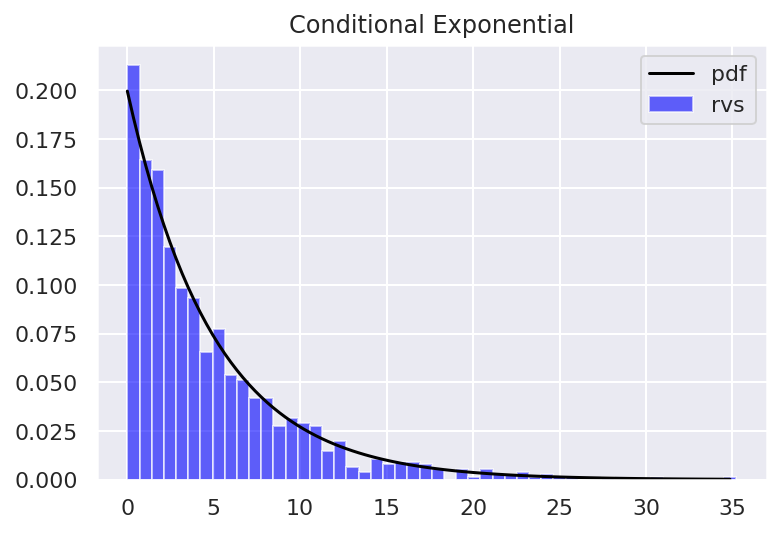

In [58]:
# The memoryless property of the exponential distribution

lam=.2
a = 3.2
N = 2000

dist = sp.stats.expon(scale=1./lam)
rvs = dist.rvs(size=N)
plot_hist_dist(rvs[rvs >= a] - a, dist, title="Conditional Exponential")

## Normal Distribution


Probably the most famous distribution in all of statistics is the normal (or Gaussian) distribution.  It is parameterized by its mean $\mu$ and standard deviation $\sigma$, and the distribution is denoted $N(\mu, \sigma^2)$.  Its PDF is given by

$$ p(x) = \frac{1}{\sqrt{2 \pi} \sigma} \exp \left(\frac{(x - \mu)^2}{2 \sigma^2} \right) \,.$$

**Stats:**
- The mean is $\mathbb{E}[X] = \mu$
- The variance is $\mbox{Var}[X] = \sigma^2$.

**Examples:**
- The height or weight of students in a classroom.
- The distribution of test scores on the SAT.

**Useful Facts:** Let's write $n(x  \mid  \mu, \sigma^2)$ to be the normal PDF with mean $\mu$ and standard deviation $\sigma$.  A little bit of algebra shows that the distribution satisfies translational symmetry,

$$ n(x  \mid  \mu, \sigma^2) = n(x - \mu  \mid  0, \sigma^2) $$

and scaling symmetry

$$ n(x  \mid  \mu, \sigma^2) = n\left(\frac{x - \mu}{\sigma} \,\Big|\, 0, 1\right)\,. $$

A standard normal distribution is one with mean $\mu = 0$ and standard deviation $\sigma = 1$.

In [59]:
# Normal distribution, two parameters

mu_slider = FloatSlider(value=0, min=-3, max=3, step=0.05, description='$\mu$')
sigma_slider = FloatSlider(value=1.0, min=0.5, max=2.0, step=0.05, description='$\sigma$')
interact(
    interact_dist(sp.stats.norm, xlim=[-6, 6], ylim=[0, 0.8]),
    loc=mu_slider, scale=sigma_slider
);

interactive(children=(FloatSlider(value=0.0, description='$\\mu$', max=3.0, min=-3.0, step=0.05), FloatSlider(…

## Central Limit Distribution


Often, when we look at random variables, we want to understand their mean.  It turns out this behaves in a vary predictable way.  As $n \to \infty$,

$$ \sum_{k=1}^n \frac{X_k}{n} \longrightarrow \mathbb{E}[X] \,.$$

To be more precise, as $n \to \infty$, we have that the mean becomes a random variable that's distributed normally,
$$ \sum_{k=1}^n \frac{X_k}{n} \sim N\left(\mathbb{E}[X], \frac{\mbox{Var}[X]}{n} \right) .$$

Let's see that in action.  We'll plot very different distributions:

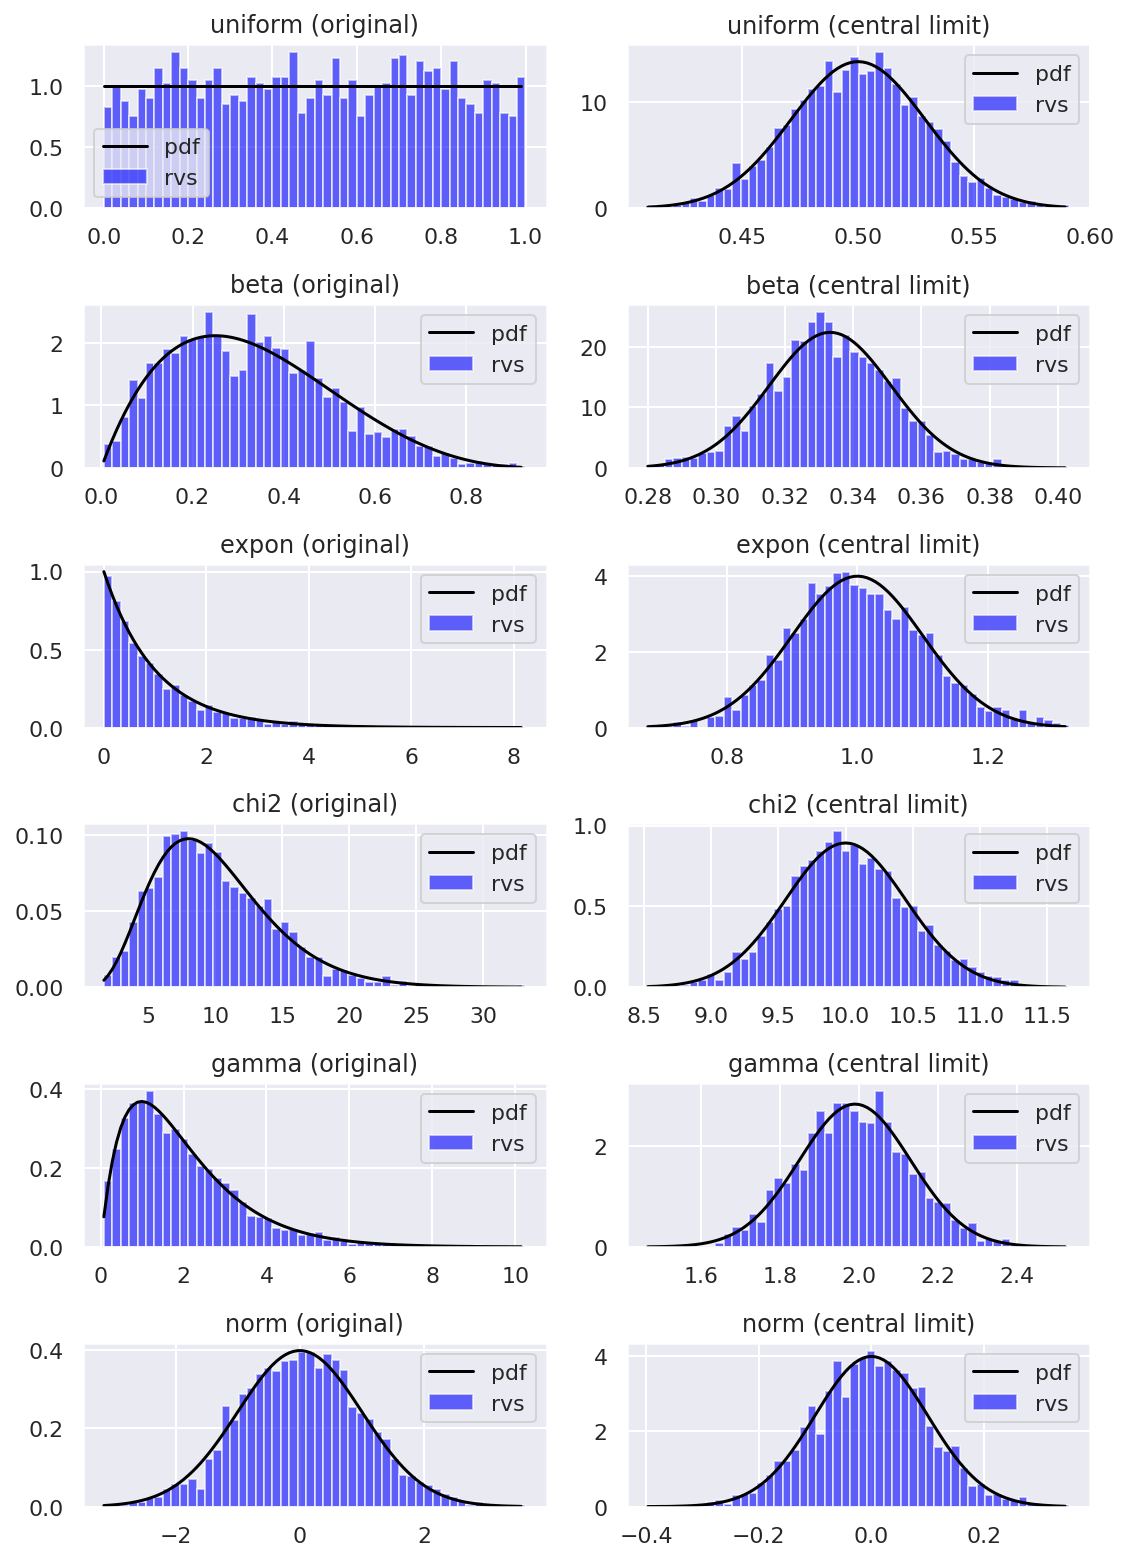

In [65]:
# A variety of distributions, when averaged, are normal

dists = (
    sp.stats.uniform(),
    sp.stats.beta(a=2., b=4.),
    sp.stats.expon(),
    sp.stats.chi2(df=10),
    sp.stats.gamma(a=1.99),
    sp.stats.norm(),
)

N=2000
M=100

plt.figure(figsize=(8, 11))
for k, dist in enumerate(dists):
    ax = plt.subplot(6,2,2*k+1)
    plot_hist_dist(dist.rvs(size=N), dist, title=dist.dist.name + ' (original)', ax=ax)
    
    ax = plt.subplot(6,2,2*k+2)
    m, v = dist.stats()
    rvs = dist.rvs(size=(N,M)).mean(axis=1)
    plot_hist_dist(rvs, sp.stats.norm(loc=m, scale=np.sqrt(v / M)), 
                   title=dist.dist.name + ' (central limit)', ax=ax)

plt.tight_layout()

## Beta Distribution


The Beta distribution is a distribution on $[0,1]$ that is very closely rated to the binomial distribution.  It has a PDF given by

$$ p(x) = \frac{x^{\alpha-1} (1-x)^{\beta - 1}}{\mbox{B}(\alpha, \beta)} $$

where $\mbox{B}(\alpha, \beta)$ is the beta function, which is just used as a normalizing constant to make $p(x)$ a probability distribution.  We'll denote this distribution $B(\alpha, \beta)$.

**Examples:**
- If $\alpha = 1$ and $\beta = 1$, this is just the uniform distribution.

**Stats:**
- The mean is $\mathbb{E}[X] = \frac{\alpha}{\alpha + \beta}$
- The variance is $\mbox{Var}[X] = \frac{\alpha \beta}{(\alpha + \beta)^2 (\alpha + \beta + 1)}$.

In [66]:
# Beta distribution, two parameters

a_slider = IntSlider(value=1, min=1, max=5, description='a')
b_slider = IntSlider(value=1, min=1, max=5, description='b')
interact(
    interact_dist(sp.stats.beta, xlim=[0, 1], ylim=[0, 3]),
    a=a_slider, b=b_slider
);

interactive(children=(IntSlider(value=1, description='a', max=5, min=1), IntSlider(value=1, description='b', m…

## Bayes' Theorem


Bayes' Theorem is a simple rule about conditional probabilities that has profound consequences.

$$ \mathbb{P}[X=x \mid Y=y] = \frac{\mathbb{P}[Y=y \mid X=x] \cdot \mathbb{P}[X=x]}{\mathbb{P}[Y=y]} $$

Mathematically, it's simply derived from the fact that
$$ \mathbb{P}[X=x\mid Y=y] \cdot \mathbb{P}[Y=y] = \mathbb{P}[X=x, Y=y] = \mathbb{P}[Y=y, X=x] = \mathbb{P}[Y=y \mid X=x] \cdot \mathbb{P}[X=x] \,.$$

While it seems trivial, it tells us what we know about one variable ($X$) given information about another ($Y$). 

**Example:** Assume we have  biased Bernoulli $X$ that takes on $1$ with probability $P$.  We don't know $P$; we can call that a random variable as well, and let's assume it's beta distributed with parameters $\alpha$ and $\beta$ (denoted $B(\alpha, \beta)$).  By observing flips of $X$, we can intuitively infer the value of $P$.

Using Bayes' Theorem, we have that the new distribution of
$$ 
\begin{align}
\mathbb{P}[P=p \mid X=1] \propto\,\, & \mathbb{P}[X=1 \mid P=p] \cdot \mathbb{P}[P=p] \\
 \propto\,\, & p \cdot p^{\alpha-1} (1-p)^{\beta-1} \\
 \propto\,\, & p^{\alpha} (1-p)^{\beta-1}
\end{align}
$$
It's not hard to show that
$$ \mathbb{P}[P=p \mid X=1] = B(\alpha+1, \beta)\,. $$
Similarly, 
$$ \mathbb{P}[P=p \mid X=0] = B(\alpha, \beta+1)\,. $$

Stated differently, if we have $P$ distributed as $B(\alpha, \beta)$ (the **prior**), and if we observe $X=1$, we update our estimate of the distribution of $P$ (the **posterior**) to $B(\alpha+1, \beta)$, and if we observe $X=0$, we update the posterior to $B(\alpha, \beta+1)$.  The fact that the Bayes' Theorem equations can be solved in closed form makes the Bernoulli and Beta distributions **Conjugate Priors**.

**Example:** We serve ads to individuals, and our prior belief that they will click on an ad is $P$ distributed $B(\alpha, \beta)$.  If we see them click on the ad, then our posterior for $P$ is $B(\alpha+1, \beta)$, and if they do not, then our posterior is $B(\alpha, \beta+1)$.

Continuing on, if we show another ad to the same individual, we can get this process to update again.  So if they click on 2 of the 10 ads we show them, then our posterior $P$ is $B(\alpha+2, \beta+8)$.

In fact, the canonical interpretation of $B(\alpha, \beta)$ is our belief about the odds of some $X$ being successful if we have seen $\alpha$ 1s and $\beta$ 0s.

Below is Bayes' Theorem in action:

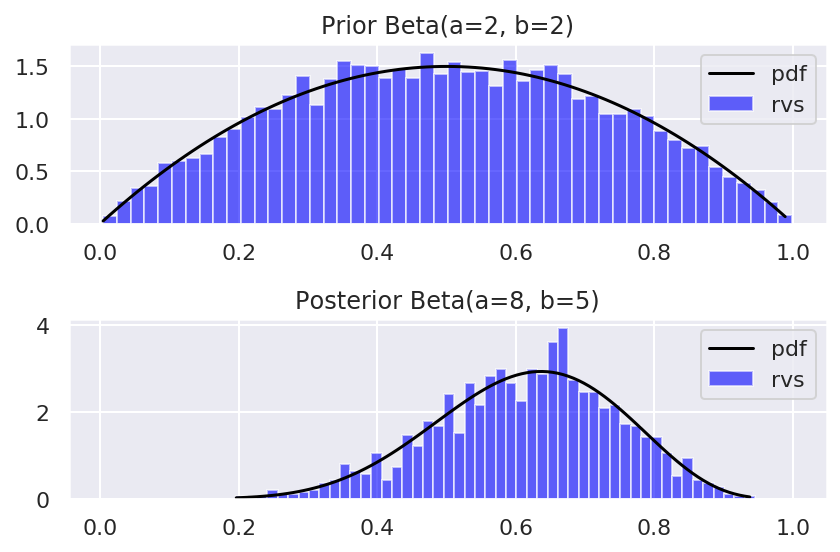

In [39]:
# Beta and binomial are conjugate priors

def binomial_bayes(a_0, b_0, a_1, b_1):
    prior = sp.stats.beta(a=a_0, b=b_0)
    posterior = sp.stats.beta(a=a_0+a_1, b=b_0+b_1)

    prior_rvs = prior.rvs(size=10000)
    variates = sp.stats.binom(n=a_1+b_1, p=prior_rvs).rvs()
    posterior_rvs = prior_rvs[variates == a_1]

    ax1 = plt.subplot(2,1,1)
    plot_hist_dist(prior_rvs, prior, title="Prior Beta(a={a}, b={b})".format(**prior.kwds), ax=ax1)
    ax2 = plt.subplot(2,1,2, sharex=ax1)
    plot_hist_dist(posterior_rvs, posterior, title="Posterior Beta(a={a}, b={b})".format(**posterior.kwds), ax=ax2)
    
    plt.tight_layout()
    
binomial_bayes(a_0=2, b_0=2, a_1=6, b_1=3)

Continuing with the previous example,  we expect these three facts to be true intuitively:
- If $X=1$, we expect our estimate of $P$ to go up.
- If $X=0$, we expect our estimate of $P$ to go down.
- In either case, we expect that we have learned more information about $P$ and we expect the uncertainty of $P$ to decrease.

We can see these 3 facts in the plots of $\beta$ below:

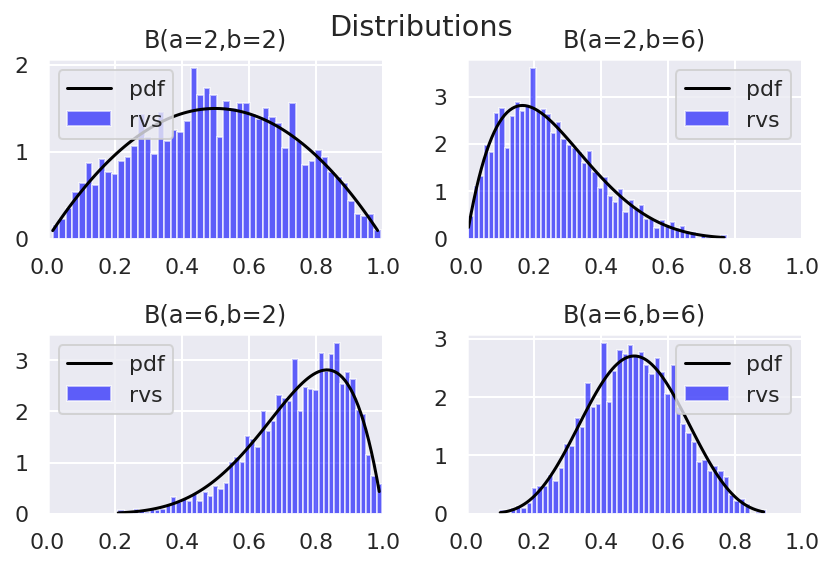

In [40]:
# Intuition of beta distribution in terms of the Bernoulli

dists = (
    sp.stats.beta(a=2, b=2),
    sp.stats.beta(a=2, b=6),
    sp.stats.beta(a=6, b=2),
    sp.stats.beta(a=6, b=6),
)

N=2000
M=100

plt.figure()
for k, dist in enumerate(dists):
    ax = plt.subplot(2,2,k+1)
    plot_hist_dist(
        dist.rvs(size=N),
        dist,
        title="B(a={a},b={b})".format(**dist.kwds),
        ax=ax
    )
    ax.set_xlim([0, 1])
plt.suptitle('Distributions')
plt.tight_layout()

*Copyright &copy; 2019 [Pragmatic Institute](https://www.pragmaticmarketing.com/data-science). This content is licensed solely for personal use. Redistribution or publication of this material is strictly prohibited.*